<a href="https://colab.research.google.com/github/Thitirat99/AllSub/blob/main/TransferML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
ให้นักศึกษาประยุกต์ใช้ MobileNETV2 กับข้อมูลรูปภาพนักศึกษาตาม Assignment ก่อนหน้านี้

#Preprocess Data

In [5]:
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt
#import cv2
#print("OpenCV-Python Version {}".format(cv2.__version__))
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/CNN_dataset'

In [8]:
train_dir = os.path.join(path,"training_set")
test_dir = os.path.join(path,"test_set")

# ImageDataGenerator

In [9]:
data_gen_train = ImageDataGenerator(rescale = 1/255.)
data_gen_test = ImageDataGenerator(rescale = 1/255.)

In [10]:
#class_mode = categorical
train_generator= data_gen_train.flow_from_directory(train_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")
test_generator= data_gen_test.flow_from_directory(test_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")

Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [11]:
first_element = test_generator[0]


In [12]:
train_generator.image_shape

(128, 128, 3)

In [13]:
train_generator.filenames

['emma/emma1.jpg',
 'emma/emma10.jpg',
 'emma/emma11.jpg',
 'emma/emma12.jpg',
 'emma/emma13.jpg',
 'emma/emma14.jpg',
 'emma/emma15.jpg',
 'emma/emma16.jpg',
 'emma/emma17.jpg',
 'emma/emma18.jpg',
 'emma/emma19.jpg',
 'emma/emma2.jpg',
 'emma/emma20.jpg',
 'emma/emma21.jpeg',
 'emma/emma22.jpg',
 'emma/emma23.jpg',
 'emma/emma24.jpg',
 'emma/emma25.jpg',
 'emma/emma26.jpg',
 'emma/emma27.jpg',
 'emma/emma28.jpg',
 'emma/emma29.jpg',
 'emma/emma3.jpg',
 'emma/emma30.jpg',
 'emma/emma31.jpg',
 'emma/emma32.jpg',
 'emma/emma33.jpg',
 'emma/emma34.jpg',
 'emma/emma35.jpg',
 'emma/emma36.jpg',
 'emma/emma37.jpg',
 'emma/emma38.jpg',
 'emma/emma39.jpg',
 'emma/emma4.jpg',
 'emma/emma40.jpg',
 'emma/emma41.jpg',
 'emma/emma42.jpg',
 'emma/emma43.jpg',
 'emma/emma44.jpg',
 'emma/emma45.jpg',
 'emma/emma46.jpg',
 'emma/emma47.jpg',
 'emma/emma48.jpg',
 'emma/emma49.jpg',
 'emma/emma5.jpg',
 'emma/emma50.jpg',
 'emma/emma51.jpg',
 'emma/emma52.jpg',
 'emma/emma53.jpg',
 'emma/emma54.jpg',
 'em

In [14]:
train_generator.num_classes

2

In [15]:
class_n  = train_generator.classes
class_n

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
class_n.shape

(120,)

In [17]:
class_names = ['emma', 'jennie']

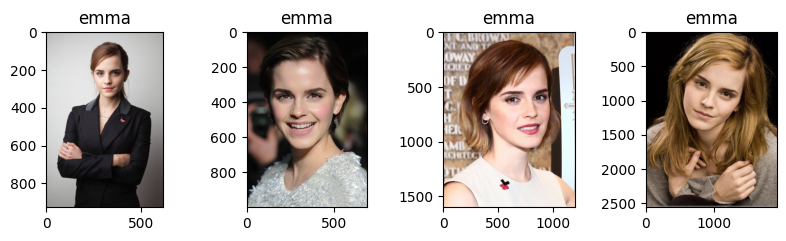

In [18]:
import matplotlib.pyplot as plt
import os

src_path = "/content/drive/MyDrive/Colab Notebooks/CNN_dataset/training_set"
sub_train = os.listdir(src_path)
fig = plt.figure(figsize=(10,5))
for i in range(4):
    #path = os.path.join(src_path,sub_train[i])
    train_generator.filenames
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(src_path,train_generator.filenames[i]))
    plt.title(class_names[train_generator.classes[i]])
    plt.imshow(img, cmap=plt.get_cmap('gray'))

#MobileNet

In [22]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top = False, weights = "imagenet") # include_top= false บอกว่าเป็นการ fix weight and bias โ่ด่ย่่ให้มีการตัด   head  ออก

9406464/9406464 [==============================] - 0s 0us/step


In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[

In [24]:
base_model_trainable = False  #fix weight and bias ตาม model ต้นฉบับ



```
# มีการจัดรูปแบบเป็นโค้ด
```

# ADD custom head

In [25]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1,activation = 'sigmoid')(average_pooling_layer)


In [26]:
model = tf.keras.models.Model(inputs=base_model.input, outputs = prediction_layer)

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        

# Train Model

In [28]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
history = model.fit(train_generator, batch_size=10,epochs=10,validation_data = test_generator)

Epoch 1/10
1/1 [==============================] - 25s 25s/step - loss: 0.7246 - accuracy: 0.5583 - val_loss: 0.5075 - val_accuracy: 0.7750
Epoch 2/10
1/1 [==============================] - 13s 13s/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 0.4907 - val_accuracy: 0.8083
Epoch 3/10
1/1 [==============================] - 13s 13s/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.8167
Epoch 4/10
1/1 [==============================] - 14s 14s/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.4665 - val_accuracy: 0.8250
Epoch 5/10
1/1 [==============================] - 12s 12s/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.8250
Epoch 6/10
1/1 [==============================] - 11s 11s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.4513 - val_accuracy: 0.8250
Epoch 7/10
1/1 [==============================] - 11s 11s/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.4445 - val_accuracy: 0.8250
Epoch 8/10
1/1 [===========

# Fine Tuning

In [31]:
len(base_model.layers)

154

In [32]:
base_model.trainable = True

In [33]:
for layer in base_model.layers[:100]:  #layer 0-100 จะ fix weight and bias เพราะส่วนนี้จะทำหน้าที่หาคุณลักษณะสำคัญของภาพเช่นขอบของภาพ
  layer.trainable = False

In [34]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [36]:
history = model.fit(train_generator,epochs=10,validation_data = test_generator)

Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.1289 - accuracy: 0.9917 - val_loss: 0.3499 - val_accuracy: 0.8917
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.3241 - val_accuracy: 0.9000
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 7s 7s/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2939 - val_accuracy: 0.9083
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9083
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2816 - val_accuracy: 0.9083
Epoch 8/10
1/1 [=======================

In [37]:
loss0, accuracy0 = model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.2678 - accuracy: 0.9167


In [38]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.27
initial accuracy: 0.92


In [39]:
probabilities = model.predict_generator(generator=test_generator)

<ipython-input-39-1cadbf1ed5b8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(generator=test_generator)


In [40]:
y_true = test_generator.classes

In [41]:
y_pred = (probabilities > 0.5).astype("int32")

In [42]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[32 28]
 [34 26]]


In [44]:
model.save("emmajennie_model.h5")
print('saved model to disk')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


saved model to disk


In [65]:
model.save('/content/drive/MyDrive/Colab Notebooks/Machine Learning/emmajennie_model.h5')
print('saved model to drive')

saved model to drive


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


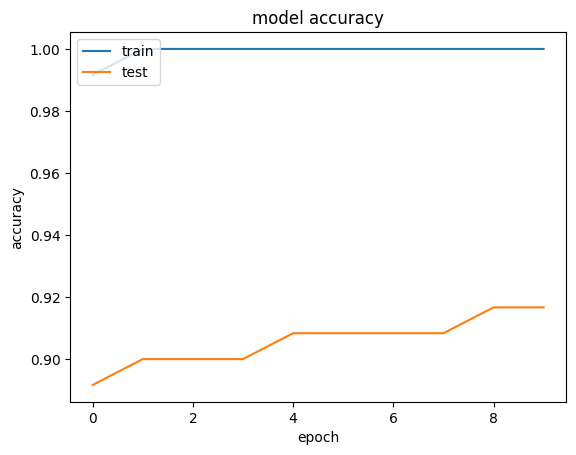

In [53]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# Load Model

In [66]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('emmajennie_model.h5')
#summaize model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


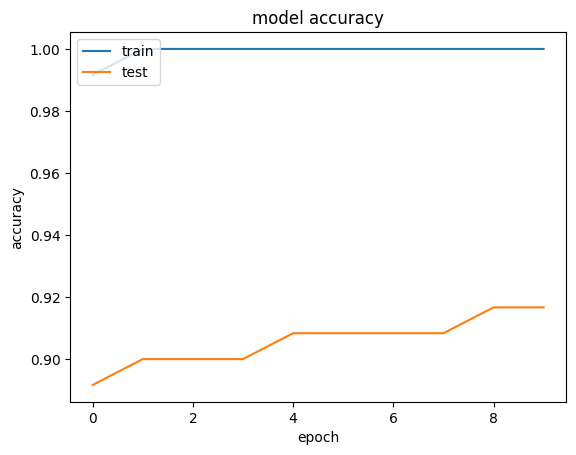

In [67]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

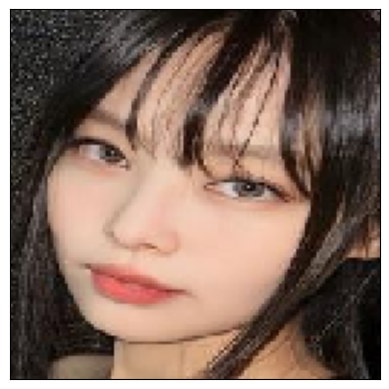

In [69]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img

x_new1 = load_img(
    '/content/unseen1.jpg',
    target_size=(128, 128),
)
plt.xticks([])
plt.yticks([])
plt.imshow(x_new1)

In [70]:
from tensorflow.keras.utils import img_to_array

x_new1 =  img_to_array(x_new1)
x_new1_re = x_new1.reshape(1, 128,128,3)
print("unseen shape", x_new1_re.shape)
predictions = model.predict(x_new1_re)
print(predictions)
classes_x = (predictions[0] > 0.5).astype("int32") #binary class
print('Your image ispredicted as a',class_names[classes_x[0]])
print( classes_x)
if classes_x == 0:
   print(' predicted as Emma')
else:
  print(' predicted as Jennie')

unseen shape (1, 128, 128, 3)
1/1 [==============================] - 1s 920ms/step
[[0.92241275]]
Your image ispredicted as a jennie
[1]
 predicted as Jennie


#Thitirat Patthapan 6406021631043